In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their:", their["model"], their["mdp"], sep="\n")
print()
print("our:", our["model"], our["mdp"], sep="\n")
data

their:
barzur20aft.Bitcoin(alpha=0.125, gamma=0.25, maximum_fork_length=8)
MDP of size 179 / 4 / 657 / 3.7

our:
sm.SelfishMining(Bitcoin(), alpha=0.125, gamma=0.25, maximum_height=8, maximum_size=0, force_consider_own=True)
MDP of size 16777 / 3 / 78105 / 4.7


,alpha,gamma,horizon,value_eps,model,vi_iter,vi_time,vi_start_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time
0,0.30,0.5,200,0.01,their,1157,0.812622,60.614000,53,53,0.002458,0.324020,2,0.061449
1,0.30,0.5,200,0.01,our,1228,96.593887,60.924394,139,139,0.003309,0.301100,2,0.113182
2,0.30,0.5,100,0.01,their,578,0.443036,30.354777,53,53,0.009877,0.324020,2,0.060773
3,0.30,0.5,100,0.01,our,614,46.574346,30.474356,147,147,0.003706,0.303390,2,0.121164
4,0.45,0.0,100,0.01,their,663,0.502695,57.630411,84,84,0.003236,0.593491,2,0.086497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.20,1.0,200,0.01,our,1085,60.414301,45.517176,174,174,0.002527,0.249939,2,0.085810
176,0.35,0.0,100,0.01,their,567,0.332107,34.822454,78,78,0.001207,0.365772,2,0.044823
177,0.35,0.0,100,0.01,our,623,37.021621,34.244603,265,265,0.006796,0.363994,2,0.127800
178,0.25,1.0,50,0.01,their,301,0.177992,15.582181,104,104,0.001604,0.332631,2,0.062828


In [3]:
data[(data.ss_n - data.ss_nonzero) != 0]

,alpha,gamma,horizon,value_eps,model,vi_iter,vi_time,vi_start_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time
15,0.20,0.5,200,0.01,our,1198,96.210565,38.003532,10,9,0.000955,0.200000,2,0.009576
53,0.20,0.5,50,0.01,our,300,23.415304,9.507183,10,9,0.001063,0.200000,2,0.007927
67,0.45,1.0,200,0.01,our,1815,154.974314,147.752582,81,80,0.001653,0.772075,2,0.062518
107,0.20,0.0,50,0.01,our,300,23.121842,9.507183,10,9,0.000934,0.200000,2,0.007771
136,0.45,1.0,50,0.01,their,397,0.263720,36.601509,91,90,0.001439,0.763056,2,0.054645
137,0.45,1.0,50,0.01,our,450,28.259940,36.269804,152,151,0.002836,0.766716,2,0.089607
151,0.20,0.0,200,0.01,our,1198,74.823932,38.003532,10,9,0.000745,0.200000,2,0.006114
167,0.20,0.0,100,0.01,our,600,41.810390,19.009275,10,9,0.000761,0.200000,2,0.006094
171,0.20,0.5,100,0.01,our,600,41.148012,19.009275,10,9,0.000767,0.200000,2,0.006155


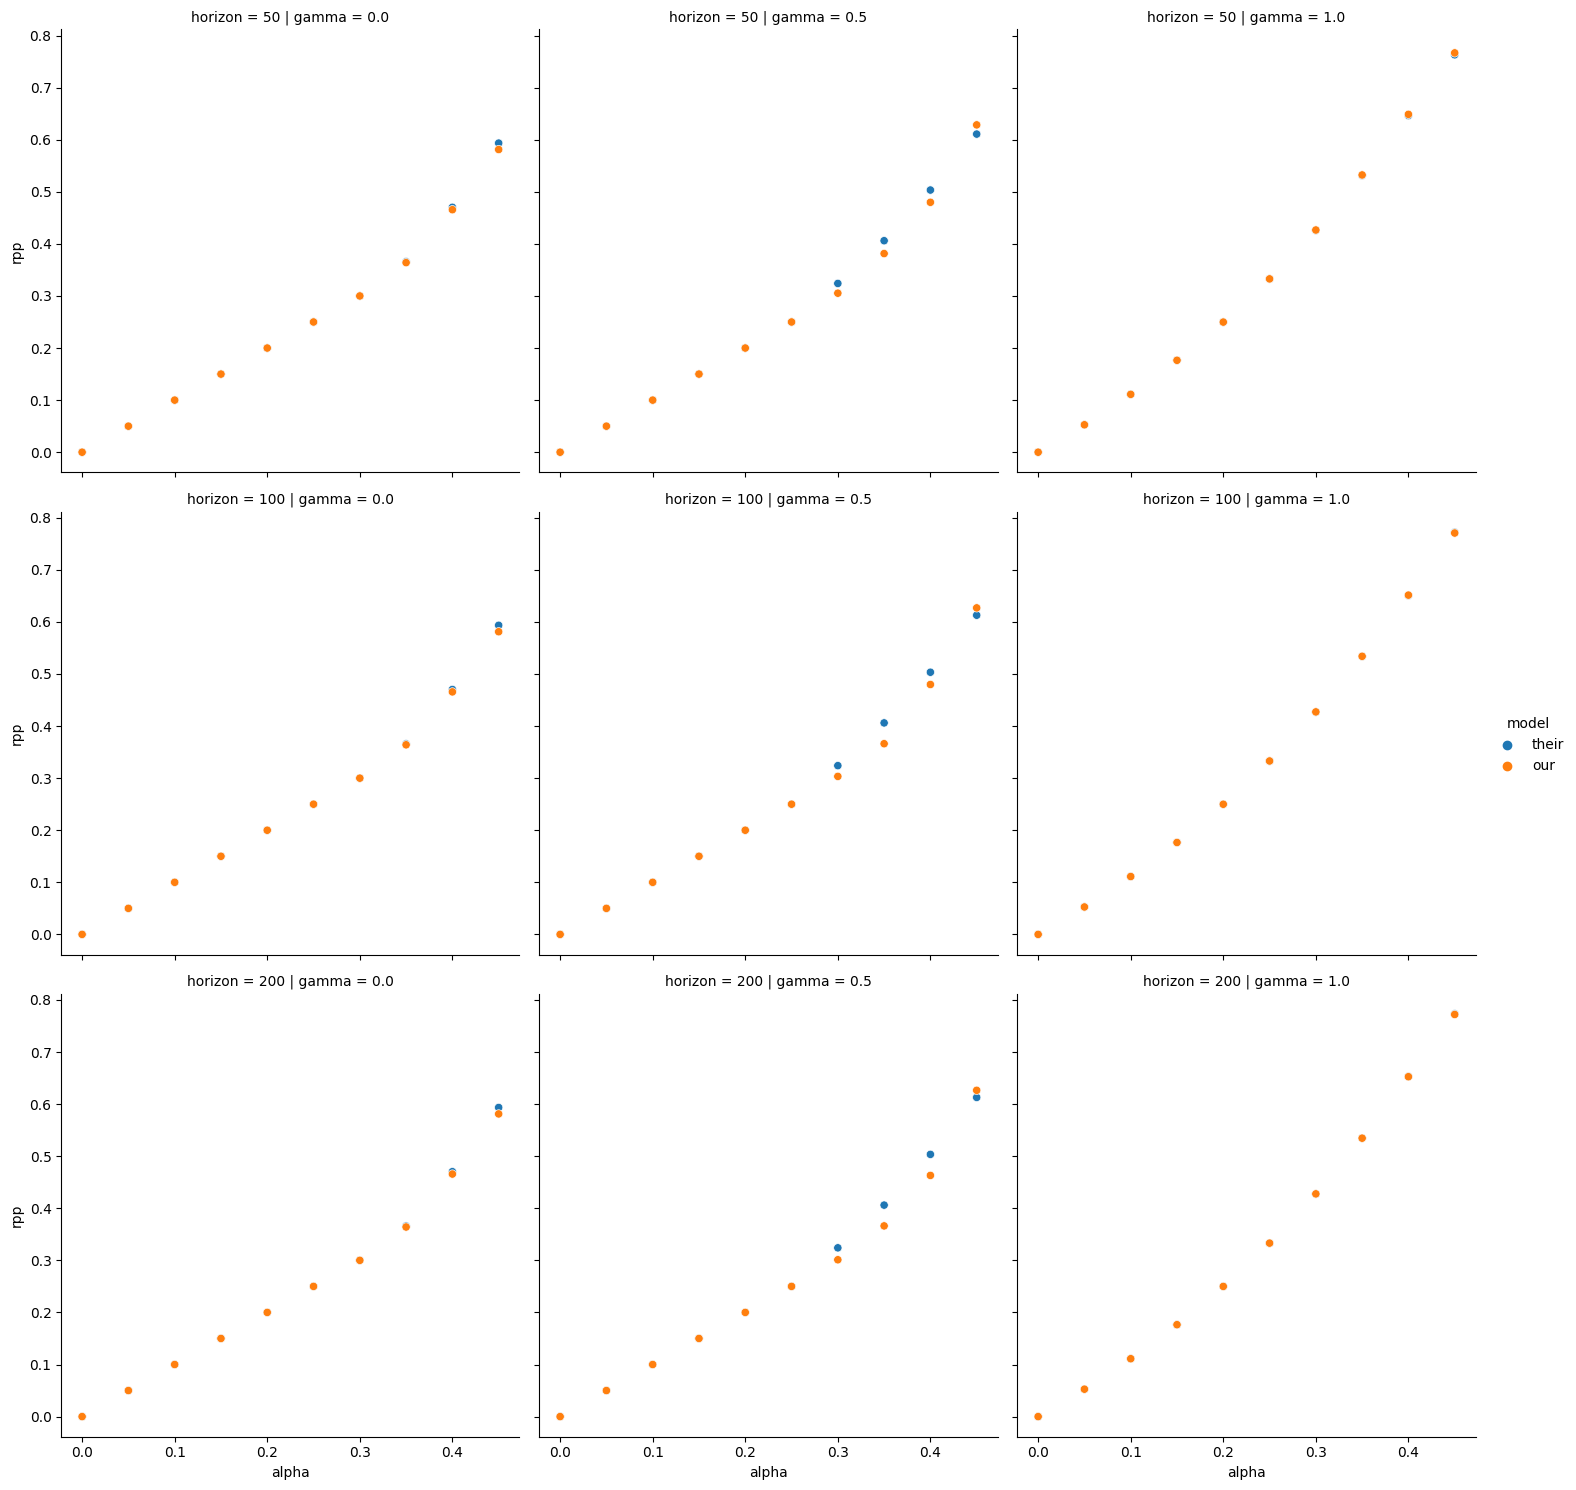

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    x="alpha",
    y="rpp",
    col="gamma",
    row="horizon",
    hue="model",
)

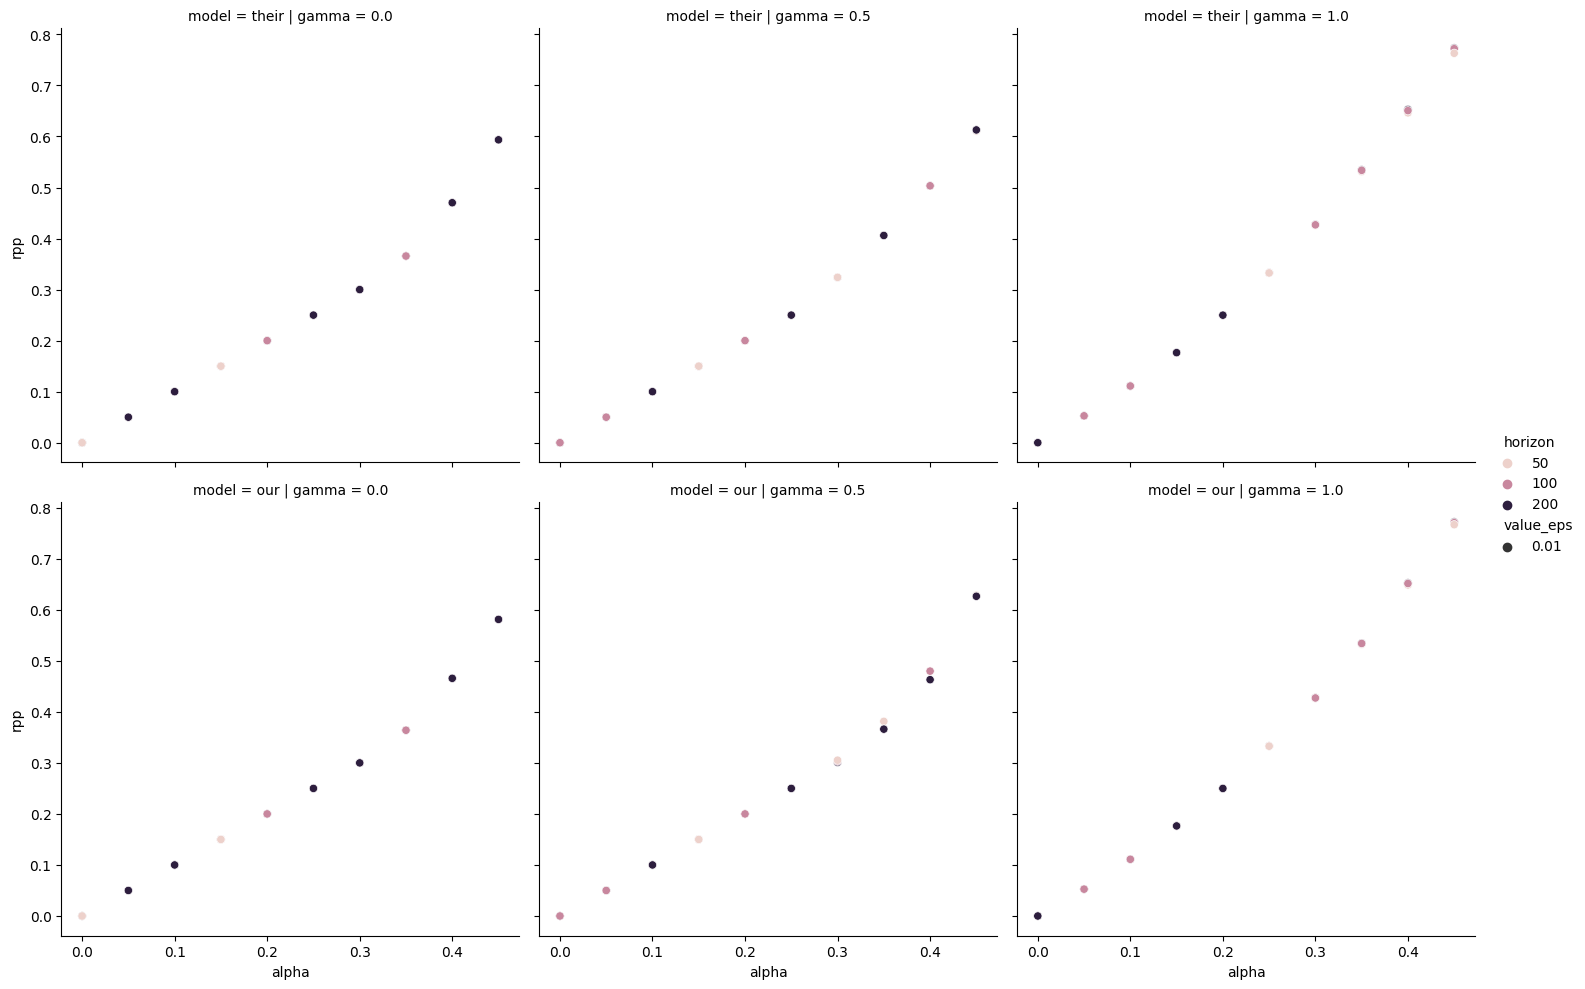

In [5]:
# Demonstrate effect of horizon
sns.relplot(
    data,
    x="alpha",
    y="rpp",
    col="gamma",
    row="model",
    hue="horizon",
    style="value_eps",
)

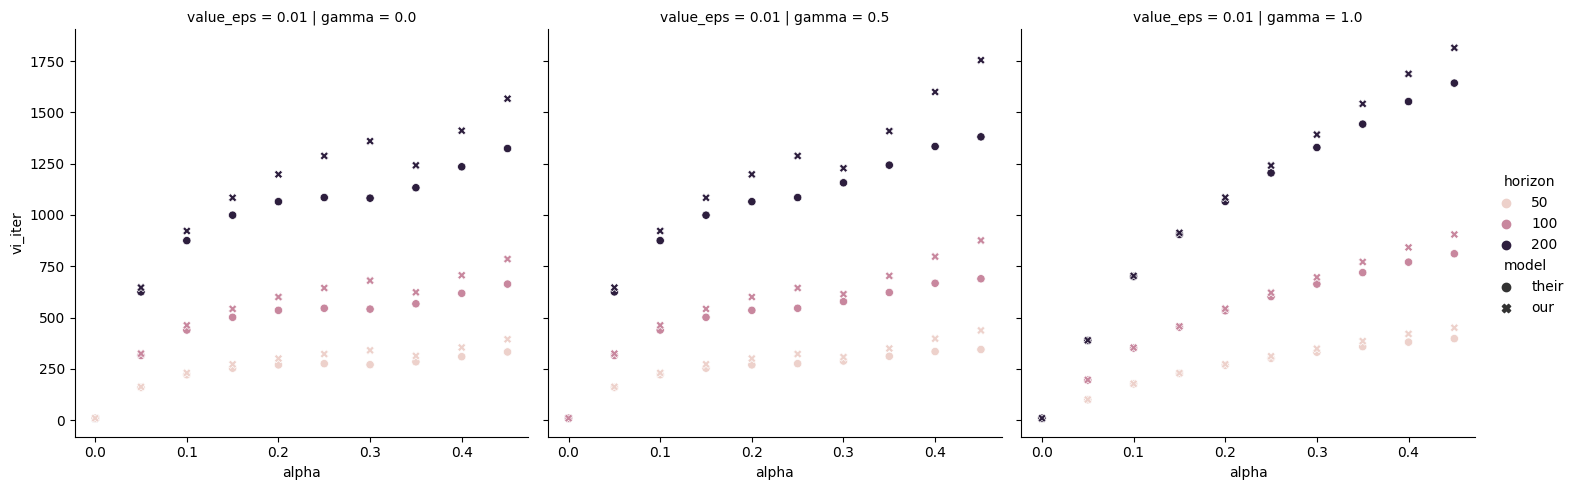

In [6]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="vi_iter",
    col="gamma",
    hue="horizon",
    row="value_eps",
    style="model",
)

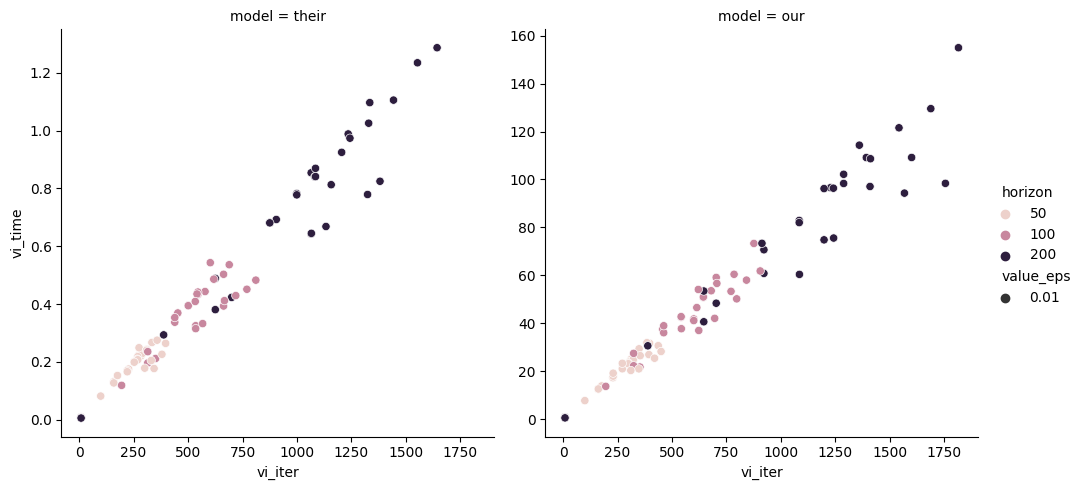

In [7]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="vi_iter",
    y="vi_time",
    hue="horizon",
    style="value_eps",
    col="model",
    facet_kws=dict(sharey=False),
)

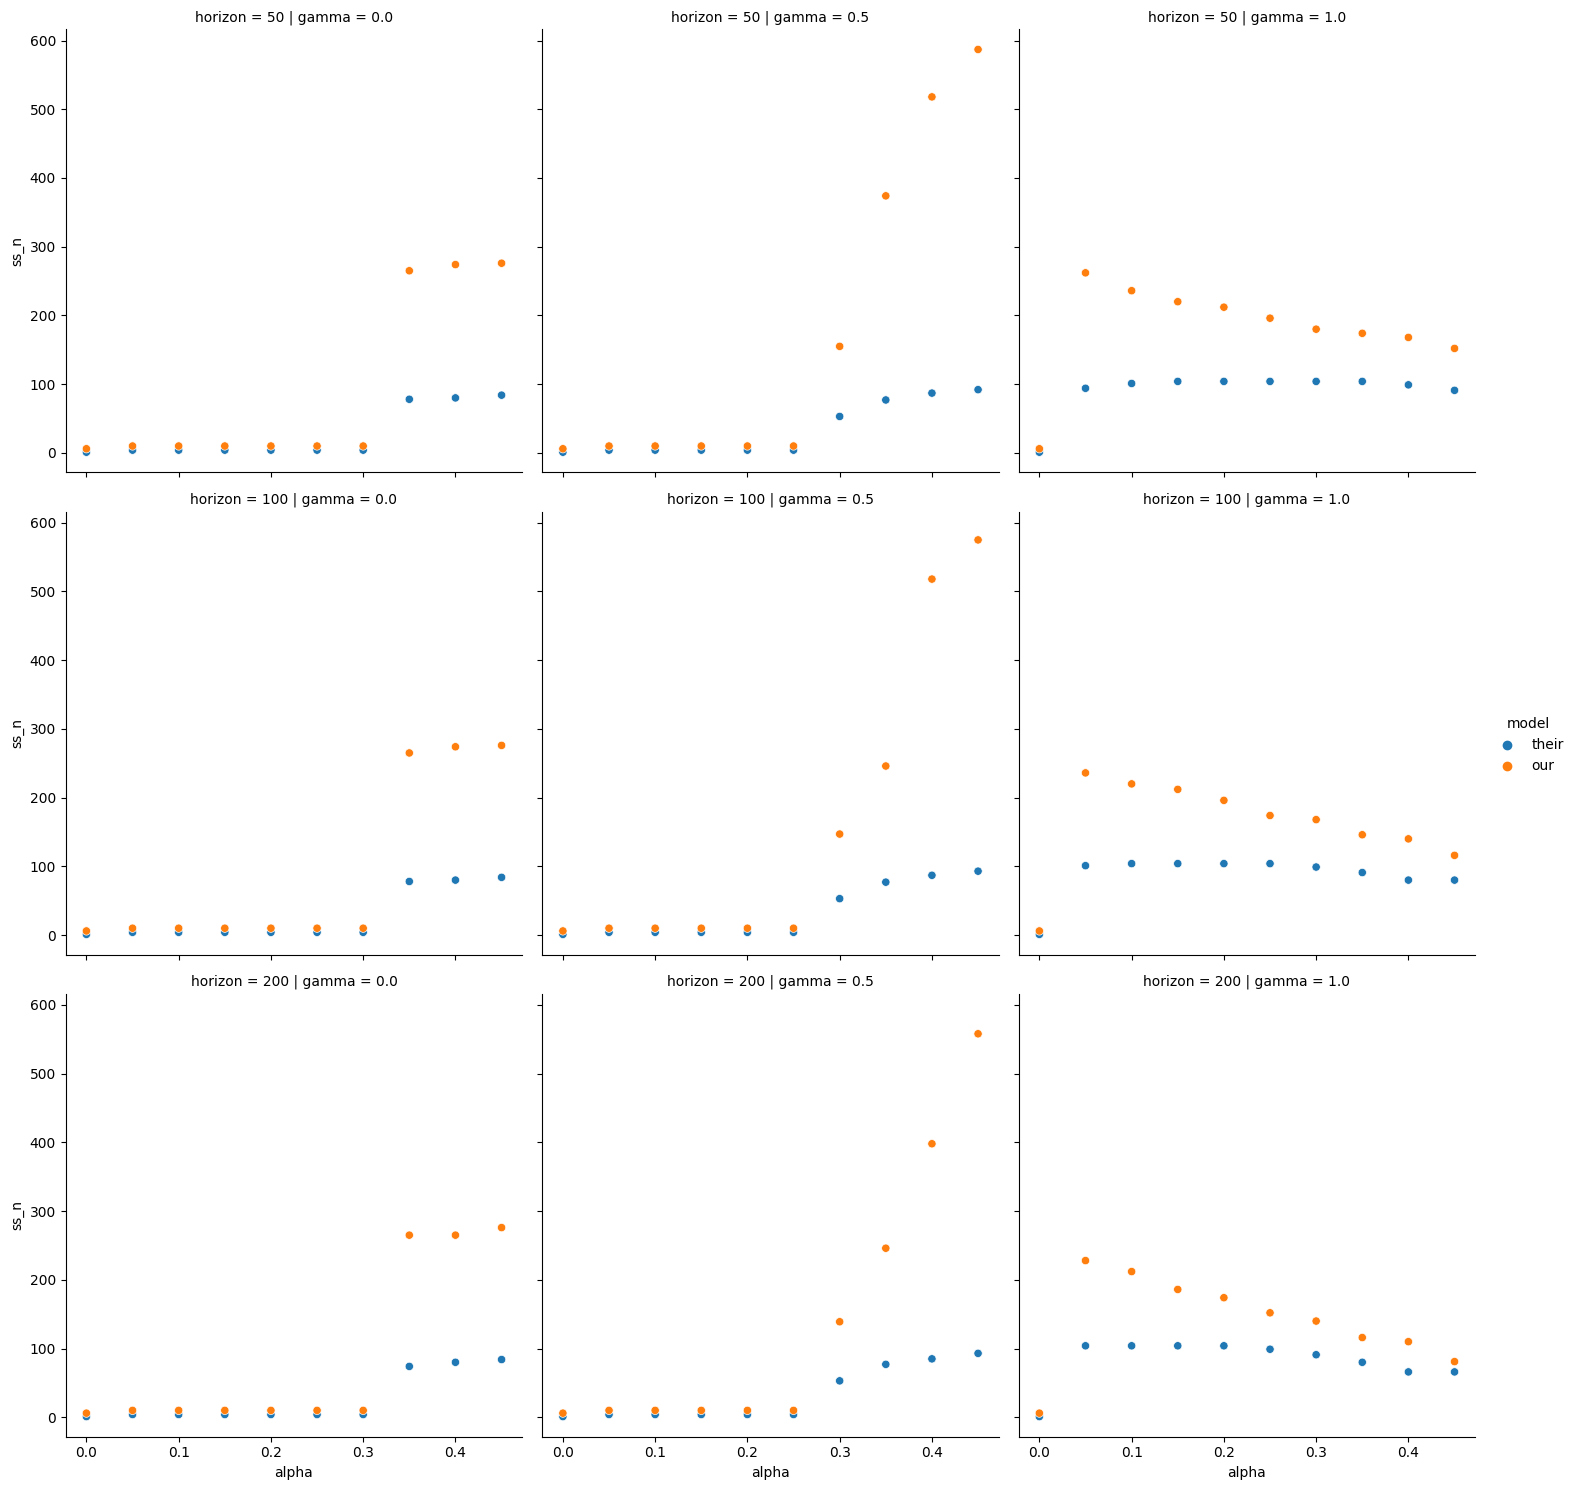

In [8]:
# Size of policy / steady state
sns.relplot(
    data,
    x="alpha",
    y="ss_n",
    col="gamma",
    row="horizon",
    hue="model",
)